Uninformed and Heuristic Search (iPython Notebook)
==================================
The following code examples are related to Uninformed and Heuristic Search Useful Python packages are "collections", "queue" and "simpleai".

Example 1: Uninformed search algorithms
----------------------------------------------------------
Overall, graph search can fall either under the uninformed or the informed category. The difference between the two is that the first one (uninformed) is naive or blind - meaning it has no knowledge of where the goal could be, while the second one (informed) uses heuristics to guide the search.

These three uninformed search strategies will be addressed:
* Depth-First Search (DFS)
* Breadth-First Search (BFS)
* Uniform Cost Search (UCS)

In [1]:
# building graphs (using dictionaries)
small_graph = {
    'A': ['B', 'C'],
    'B': ['D', 'A'],
    'C': ['A'],
    'D': ['B', 'E'],
    'E': []
}
# remark: could be done with the Node object, yet let's keep it simple
print(small_graph)

{'A': ['B', 'C'], 'B': ['D', 'A'], 'C': ['A'], 'D': ['B', 'E'], 'E': []}


In [2]:
# depth-first search
# input parameter: graph, starting point, goal (optional)
# algorithm: visit first adjacent vertex of starting point, then go into depth
# remark: visited vertices are marked; also the fringe (collection of vertices
#   that are available for expanding) are tracked
def dfs(graph, start, goal):
    print("DFS - Goal", goal)
    visited = set()
    stack = [start]
    
    while stack:
        node = stack.pop()
        print("DFS - Checking node", node, "Visited =", visited, "Stack =", stack)
        if node not in visited:
            visited.add(node)
            if node == goal:
                return
            for neighbor in graph[node]:
                if neighbor not in visited:
                    stack.append(neighbor)

# run DFS on our test tree
dfs(small_graph,'A','E')

DFS - Goal E
DFS - Checking node A Visited = set() Stack = []
DFS - Checking node C Visited = {'A'} Stack = ['B']
DFS - Checking node B Visited = {'A', 'C'} Stack = []
DFS - Checking node D Visited = {'A', 'B', 'C'} Stack = []
DFS - Checking node E Visited = {'A', 'B', 'C', 'D'} Stack = []


In [3]:
# breadth-first search
# input parameter: same as above
# algorithm: visit all vertices of the same depth before moving on deeper
# remark: DFS uses a stack and pops items from the tail (that's why we
#   need the deque package)
from collections import deque

def bfs(graph, start, goal):
    print("BFS - Goal", goal)
    visited = set()
    queue = deque(start)

    while queue:
        node = queue.pop()
        print("BFS - Checking node", node, "Visited =", visited, "Queue =", queue)
        if node not in visited:
            visited.add(node)

            if node == goal:
                return
            for neighbor in graph[node]:
                if neighbor not in visited:
                    queue.appendleft(neighbor)

# run BFS on our test tree
bfs(small_graph,'A','E')

BFS - Goal E
BFS - Checking node A Visited = set() Queue = deque([])
BFS - Checking node B Visited = {'A'} Queue = deque(['C'])
BFS - Checking node C Visited = {'A', 'B'} Queue = deque(['D'])
BFS - Checking node D Visited = {'A', 'B', 'C'} Queue = deque([])
BFS - Checking node E Visited = {'A', 'B', 'C', 'D'} Queue = deque([])


In [4]:
# uninformed cost search
# input parameter: graph, starting point, goal (optional)
# algorithm: search strategy for weighted graphs - vertices are expanded
#   according to the weights of the edges
# remark: if all weights are equal we have a BFS again!

# unfortumately we need a more complex data structure
class Graph:
    def __init__(self):
        self.edges = {
            'A': ['B', 'C'],
            'B': ['D', 'A'],
            'C': ['A'],
            'D': ['B', 'E'],
            'E': []
        }
        self.weights = {
            'AB': 0.4,
            'AC': 0.6,
            'BA': 0.2,
            'BD': 0.8,
            'DE': 0.5
        }

    def neighbors(self, node):
        return self.edges[node]

    def get_cost(self, from_node, to_node):
        return self.weights[(from_node + to_node)]

# moreover the PriorityQueue from the queue package
from queue import PriorityQueue

def ucs(graph, start, goal):
    print("UCS - Goal", goal)
    visited = set()
    queue = PriorityQueue()
    queue.put((0, start))

    while queue:
        cost, node = queue.get()
        print("UCS - Checking node", node, "Cost =", cost, "Visited =", visited)
        if node not in visited:
            visited.add(node)

            if node == goal:
                return
            for i in graph.neighbors(node):
                if i not in visited:
                    total_cost = cost + graph.get_cost(node, i)
                    queue.put((total_cost, i))

# run UCS on our test tree
sg1 = Graph()
ucs(sg1,'A','E')

UCS - Goal E
UCS - Checking node A Cost = 0 Visited = set()
UCS - Checking node B Cost = 0.4 Visited = {'A'}
UCS - Checking node C Cost = 0.6 Visited = {'A', 'B'}
UCS - Checking node D Cost = 1.2000000000000002 Visited = {'A', 'B', 'C'}
UCS - Checking node E Cost = 1.7000000000000002 Visited = {'A', 'B', 'C', 'D'}


### Exercise 5.1: Implement the Iterative Deepening algorithm by adapting the dfs function and run it on the test graph. Compare the debug output with the other search techniques.

### Exercise 5.2: Run the four algorithms on the following graph (due to the visited flag the search techniques also work on graphs). Analyze runtime and memory usage for the three uninformed search algorithms.

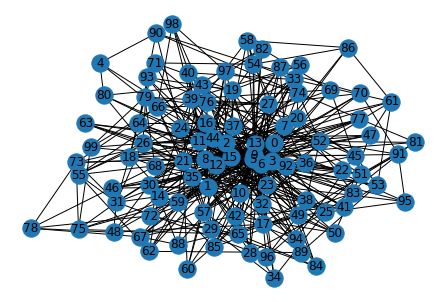

In [6]:
# import matplotlib
import matplotlib.pyplot as plt

# if necessary: > pip install networkx
from networkx import nx

# let's play with a classic Barabasi graph :-)
ba = nx.barabasi_albert_graph(100, 5)

# now draw the graph
nx.draw(ba, with_labels=True)
plt.show()

DFS: Start 1 - Goal 95
DFS: Goal has been reached in step 31 - Visited = {1, 18, 22, 23, 26, 27, 28, 29, 30, 32, 51, 53, 54, 59, 67, 70, 71, 72, 81, 82, 83, 85, 86, 87, 88, 91, 92, 93, 95, 96, 98} - Stack = [5, 6, 7, 8, 10, 11, 12, 13, 14, 16, 20, 23, 27, 40, 43, 54, 60, 65, 66, 67, 68, 74, 93, 43, 17, 53, 64, 39, 40, 47, 51, 34, 71, 42, 4, 9, 14, 16, 28, 29, 31, 32, 34, 42, 47, 48, 57, 73, 32, 73, 14, 47, 35, 9, 17, 4, 5, 6, 16, 21, 30, 5, 8, 47, 74, 2, 73, 16, 4, 10, 20, 24, 30, 31, 34, 38, 44, 59, 74, 0, 79, 19, 7, 10, 25, 37, 63, 43, 17, 52, 73, 76, 36, 14, 32, 9, 10, 11, 64, 5, 79, 37, 8, 13, 19, 21, 52, 37, 16, 17, 6, 7, 11, 15, 17, 24, 57, 58, 62, 35, 15, 21, 5, 7, 20, 21, 3, 4, 10, 33, 10, 43, 11, 17, 61, 13, 17, 19, 21, 38, 39, 43, 5, 15, 16, 17, 19, 43, 61, 78, 9, 75, 15, 38, 8, 14, 50, 11, 13, 14, 21, 36, 44, 52, 56, 58, 62, 80]
Wall time: 1.02 ms


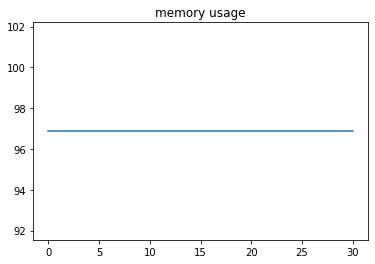

In [7]:
# package and variable for memory stats...
import os
import psutil
mem_psutil = []

# return the memory usage in MB using psutil
def memory_usage_psutil():
    process = psutil.Process(os.getpid())
    mem = process.memory_info()[0] / float(2 ** 20)
    return mem

def dfs(graph, start, goal):
    print("DFS: Start", start, "- Goal", goal)
    visited = set()
    stack = [start]
    
    while stack:
        node = stack.pop()
        mem_psutil.append(memory_usage_psutil())
        
        if node not in visited:
            visited.add(node)
            if node == goal:
                print("DFS: Goal has been reached in step", len(mem_psutil), "- Visited =", visited, "- Stack =", stack)
                return
            for neighbor in graph[node]:
                if neighbor not in visited:
                    stack.append(neighbor)

# barabasi graph with 100 nodes and 5 edges per node
from networkx import nx
ba = nx.barabasi_albert_graph(100, 5)
# we use the adjacency matrix here, so the algorithms
# have to be adapted slightly
search_tree = ba.adj

# find the path from node 1 to node 95
%time dfs(search_tree, 1, 95)

import matplotlib.pyplot as plt
%matplotlib inline
plt.title('memory usage')
plt.plot(mem_psutil)
plt.show()
# DFS does not consume that much memory; try the %timeit
# directive (1000 iterations) to observe some change :-)

## Now run the other algorithms on this search tree
## Remark: for UCS you will have to create the structure as
##   part of the Graph class

Example 2: Heuristic Search
-----------------------------------------

### Exercise 5.3: Extend the UCS algorithm to a real heuristic search technique by using the costs to the goal vertice (remark: it is necessary to extent the data model, pre-define these costs and provide a method to return the costs-to-goal). Try to implement greedy search and the A* algorithm.

Another variant of informed (heuristic) search is to define constraints that cannot be violated during the process of solving the problem: **Constraint Satisfaction Problems (CSP)**. CSP can also be used to solve real-world problems, as shown with the following example. In this problem, we have a list of names and each name can only take a fixed set of values. We also have a set of constraints between these people that needs to be satisfied.

In [8]:
# we use the simpleai package; install first > pip install simpleai
from simpleai.search import CspProblem, backtrack, \
        min_conflicts, MOST_CONSTRAINED_VARIABLE, \
        HIGHEST_DEGREE_VARIABLE, LEAST_CONSTRAINING_VALUE

# Constraint that expects all the different variables 
# to have different values
def constraint_unique(variables, values):
    # Check if all the values are unique
    return len(values) == len(set(values))  

# Constraint that specifies that one variable 
# should be bigger than other
def constraint_bigger(variables, values):
    return values[0] > values[1]

# Constraint that specifies that there should be 
# one odd and one even variables in the two variables 
def constraint_odd_even(variables, values):
    # If first variable is even, then second should
    # be odd and vice versa
    if values[0] % 2 == 0:
        return values[1] % 2 == 1 
    else:
        return values[1] % 2 == 0

In [9]:
# list of persons
variables = ('John', 'Anna', 'Tom', 'Patricia')

# list of values that each person can take
domains = {
    'John': [1,2,3],
    'Anna': [1,3],
    'Tom': [2,4],
    'Patricia': [2,3,4]
}

# constraints:
# - John, Anna, and Tom should have different values
# - Tom's value should be bigger than Anna's value
# - If John's value is odd, then Patricia's value
#   should be even and vice versa
constraints = [
    (('John', 'Anna', 'Tom'), constraint_unique),
    (('Tom', 'Anna'), constraint_bigger),
    (('John', 'Patricia'), constraint_odd_even)
]

# solve the CSP problem through the simpleai package
problem = CspProblem(variables, domains, constraints)

# however, you need some background knowledge (parameter
# tuning) - heuristic settings for variables and values!

# regular mode means: in the order of the variables
# under consideration of the constraints...
print('\nSolutions:\n\nNormal:', backtrack(problem))

# source code comment says:
# --> "Choose the variable that has less available values."
# variables are sorted by number of values in ascending
# order (and under consideration of the constraints!)
print('\nMost constrained variable:', backtrack(problem, 
        variable_heuristic=MOST_CONSTRAINED_VARIABLE))

# source code comment says:
# --> "Choose the variable that is involved on more constraints."
# variables are sorted by number of constraints in descending
# order (and under consideration of the constraints!)
print('\nHighest degree variable:', backtrack(problem, 
        variable_heuristic=HIGHEST_DEGREE_VARIABLE))

# source code comment says:
# --> "Sort values based on how many conflicts they generate if assigned."
# variables are sorted by the value in ascending order
# (and under consideration of the contraints!)
print('\nLeast constraining value:', backtrack(problem, 
        value_heuristic=LEAST_CONSTRAINING_VALUE))

# combinations of the tuning parameters above
print('\nMost constrained variable and least constraining value:', 
        backtrack(problem, variable_heuristic=MOST_CONSTRAINED_VARIABLE, 
        value_heuristic=LEAST_CONSTRAINING_VALUE))
print('\nHighest degree and least constraining value:', 
        backtrack(problem, variable_heuristic=HIGHEST_DEGREE_VARIABLE, 
        value_heuristic=LEAST_CONSTRAINING_VALUE))

# ordered by number of conflicts in ascending order
print('\nMinimum conflicts:', min_conflicts(problem))


Solutions:

Normal: {'John': 1, 'Anna': 3, 'Tom': 4, 'Patricia': 2}

Most constrained variable: {'Anna': 1, 'Tom': 2, 'John': 3, 'Patricia': 2}

Highest degree variable: {'John': 1, 'Anna': 3, 'Tom': 4, 'Patricia': 2}

Least constraining value: {'John': 1, 'Anna': 3, 'Tom': 4, 'Patricia': 2}

Most constrained variable and least constraining value: {'Anna': 1, 'Tom': 2, 'John': 3, 'Patricia': 2}

Highest degree and least constraining value: {'John': 1, 'Anna': 3, 'Tom': 4, 'Patricia': 2}

Minimum conflicts: {'John': 1, 'Anna': 3, 'Tom': 4, 'Patricia': 4}


### Exercise 5.4: Solve the following region-coloring problem - restricted set of colors (4); names should be labeled with colors so that no adjacent regions have the same color!

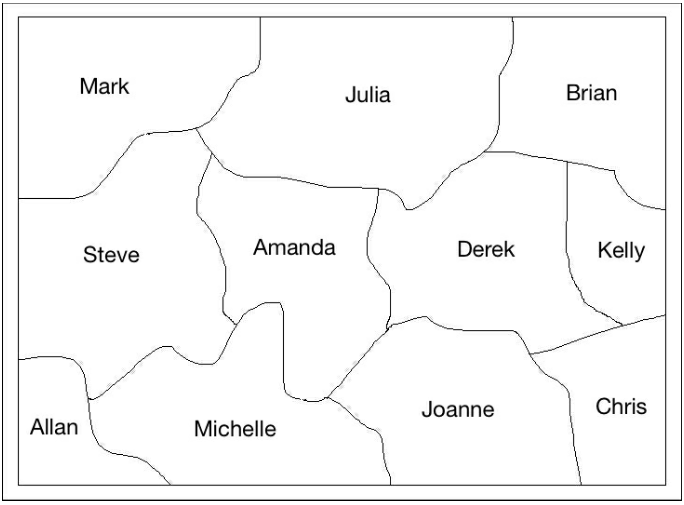

In [10]:
# import package
from simpleai.search import CspProblem, backtrack

# Specify the variables
names = ('Mark', 'Julia', 'Steve', 'Amanda', 'Brian', 'Joanne', 'Derek', 'Allan', 'Michelle', 'Kelly')

# Define the possible colors 
colors = dict((name, ['red', 'green', 'blue', 'gray']) for name in names)

# Task: define a constraint function and specify the
#       constraints using this function...
constraints = [
]

# Solve the problem
problem = CspProblem(names, colors, constraints)

# Print the solution
output = backtrack(problem)
print('\nColor mapping:\n')
for k, v in output.items():
    print(k, '==>', v)


Color mapping:

Mark ==> red
Julia ==> red
Steve ==> red
Amanda ==> red
Brian ==> red
Joanne ==> red
Derek ==> red
Allan ==> red
Michelle ==> red
Kelly ==> red


The result should be something like this:

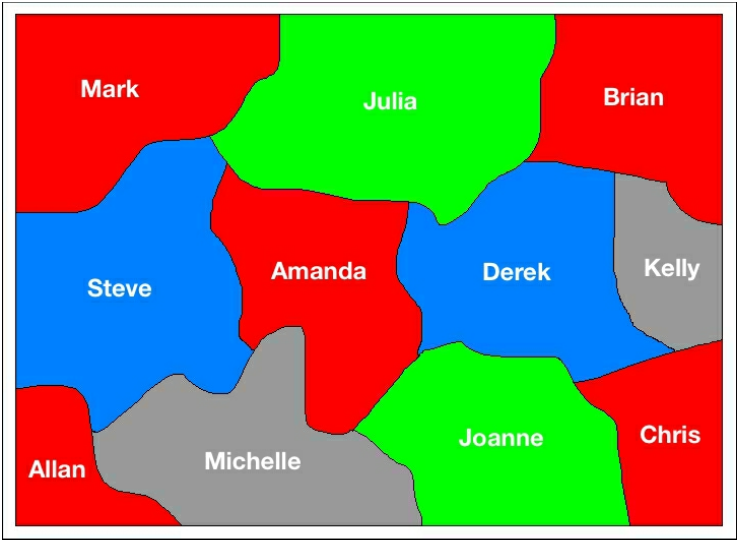